In [1]:
#importing necessary modules for data visualitztion, data processing and feature engnieering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../CA1-Dataset/CA1-Classification-Dataset.csv');


In [2]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes   Clarity  Quality  
0       10.379783        86.990970  2.963135        0  
1       15.180013        56.329076  4.500656        0  
2       16.868637        66.420093  3.055934        0  
3       18.436525       100.341674  4.628771        0  
4       11.558279        31.997993  4.075075        0

In [3]:
# finding the unique value in target variable (Quality)
print(f'Unique values of target variable: {df["Quality"].unique()}')

Unique values of target variable: [0 1]


**Examining the column names of the dataset to know what are the column names to do background research and to get the domain knowledge of the given dataset**

From the above dataset, there are 10 columns in which 9 of them are continuous values and Quality columns have two unique values (0,1).

# 1.Background Research for the given data set
1. ph is a measure of acidity or basicity of water. It is an impotant factor in determining the quality of water because people can only drink water within a certain range(between 6.5 and 8.5 according to WHO) and the recommended range for fish is between 6 and 9 according to Fondriest(https://www.fondriest.com/environmental-measurements/parameters/water-quality/ph/).

2. Hardness is also a measurement for water quality which measures the amount of minerals(especially calicum and magnesium)(unit - mg/L). Although it does not have signifaicant effects for drinking, it should be be measured for industrial usage.(reference -
https://www.puragainwater.com/what-is-the-ideal-water-hardness-for-drinking/#:~:text=The%20general%20rule%20of%20thumb,levels%20of%20calcium%20and%20magnesium.)

3. Solids(TDS- total dissolved solids) is a measurement of dissovled solids in water (unit - parts per millions) and level>1000 is unsafe for drinking.(reference - https://www.freshwatersystems.com/blogs/blog/what-is-tds-in-water-why-should-you-measure-it)

4. Chloramines  are used as disinfectant for water and up to 4 parts per million (ppm) is considered as safe to drink.(reference - https://www.cdc.gov/healthywater/drinking/public/water_disinfection.html#:~:text=What%20are%20safe%20levels%20of%20chloramine%20in%20water%3F,effects%20are%20unlikely%20to%20occur.)

5. Sulfate are found in water naturally and is measured in mg/L. The water up to the level of 500 mg/L can be drunk without laxative effect.(reference - https://www.epa.gov/sites/default/files/2014-09/documents/support_cc1_sulfate_healtheffects.pdf)

6. Conductivity is a measurment which indicates how much electricity can pass through the wate and is measured in µS/cm. Dramatic increase in conducticity indicates that water contain high polutants and up to 3000 is considered as safe for drinking. reference - https://atlas-scientific.com/blog/water-conductivity-range/#:~:text=As%20conductivity%20ranges%20determine%20how,lower%20conductance%20ranges%20are%20preferred).

7. Organic carbon(Total organic carbon(TOC)) is a measure of carbon content in water(organic materials) and is measured in ml/l. 
reference - https://edinburghsensors.com/news-and-events/water-quality-checking-using-total-organic-carbon/

8. Trihalomethanes are found in chorinated water which contained high organic carbon and maximaum accetable level is 100 µg/L.
reference - https://www.simcoemuskokahealth.org/Topics/SafeWater/drinkingwater/chemicalsminerals/THM.aspx#1a7093fe-9144-4462-ba4b-165b89f3f4dc

There are two unique values(0,1) in Quality column and value 1 may represent good quality and 0 may represent bad quality of water and the main goal is to predict the value of target feature(Quality) using the independent features.

 # 2.Data Exploration and Data Preprocessing

In [35]:
print(df.shape)

(3276, 10)


### Checking the dataset is balanced or not

In [4]:
count_value = df['Quality'].value_counts()
print(f'The number of 0 in Quality column:{count_value[0]}\n The number of 1 in Quality column:{count_value[1]}');
count_value

The number of 0 in Quality column:1998
 The number of 1 in Quality column:1278


Quality
0    1998
1    1278
Name: count, dtype: int64

In [5]:
#getting the basic statistics of the data set
df.describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes      Clarity      Quality  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [6]:
print(f'Percentage of "1" values in Quality column{((1278/3276)*100):.2f}%')
print(f'Percentage of "0" values in Quality column{((1998/3276)*100):.2f}%')


Percentage of "1" values in Quality column39.01%
Percentage of "0" values in Quality column60.99%


**From the above observations, we can see that 39.01% of data values from 'Quality' column is 1 and 60.99% of data values is 0. So, when model evaluation is done, the metrics to evaluate the model should be F1 score or should use ROC curve because accuracy score cannot be used to evaluate the model.**

### Finding duplicate rows

In [39]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Clarity, Quality]
Index: []


**From the above, it can be seen that there are no duplicate rows in the given dataset**

### 1. Finding missing values

In [7]:
#finding the null values
print(df.isnull().sum());

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64


<Axes: >

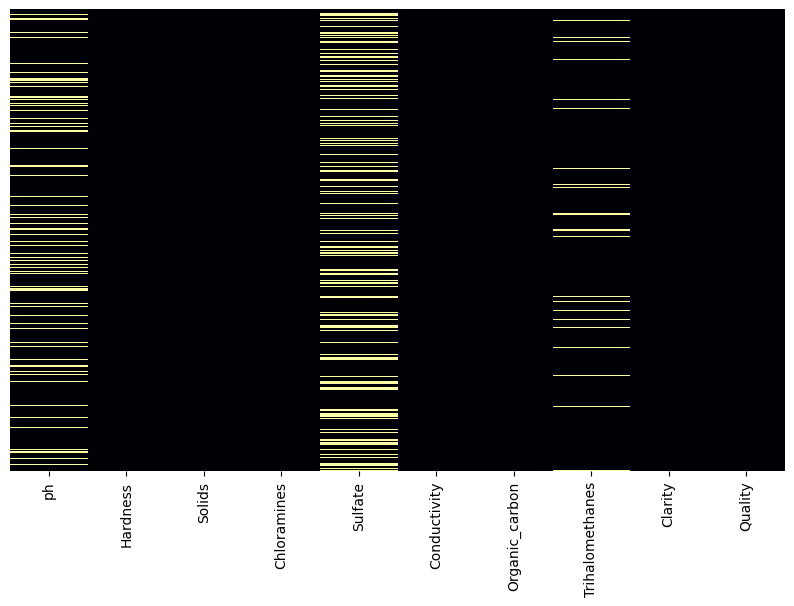

In [8]:
# visualizing mull values using heap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='inferno', cbar=False, yticklabels=False)

**From the above analysis it can be seen that there are missing values in ph, Sulfate and trihalomethanes column, with missing values 491,781 and 162 respectively.**

### 2. Handling Missing Values

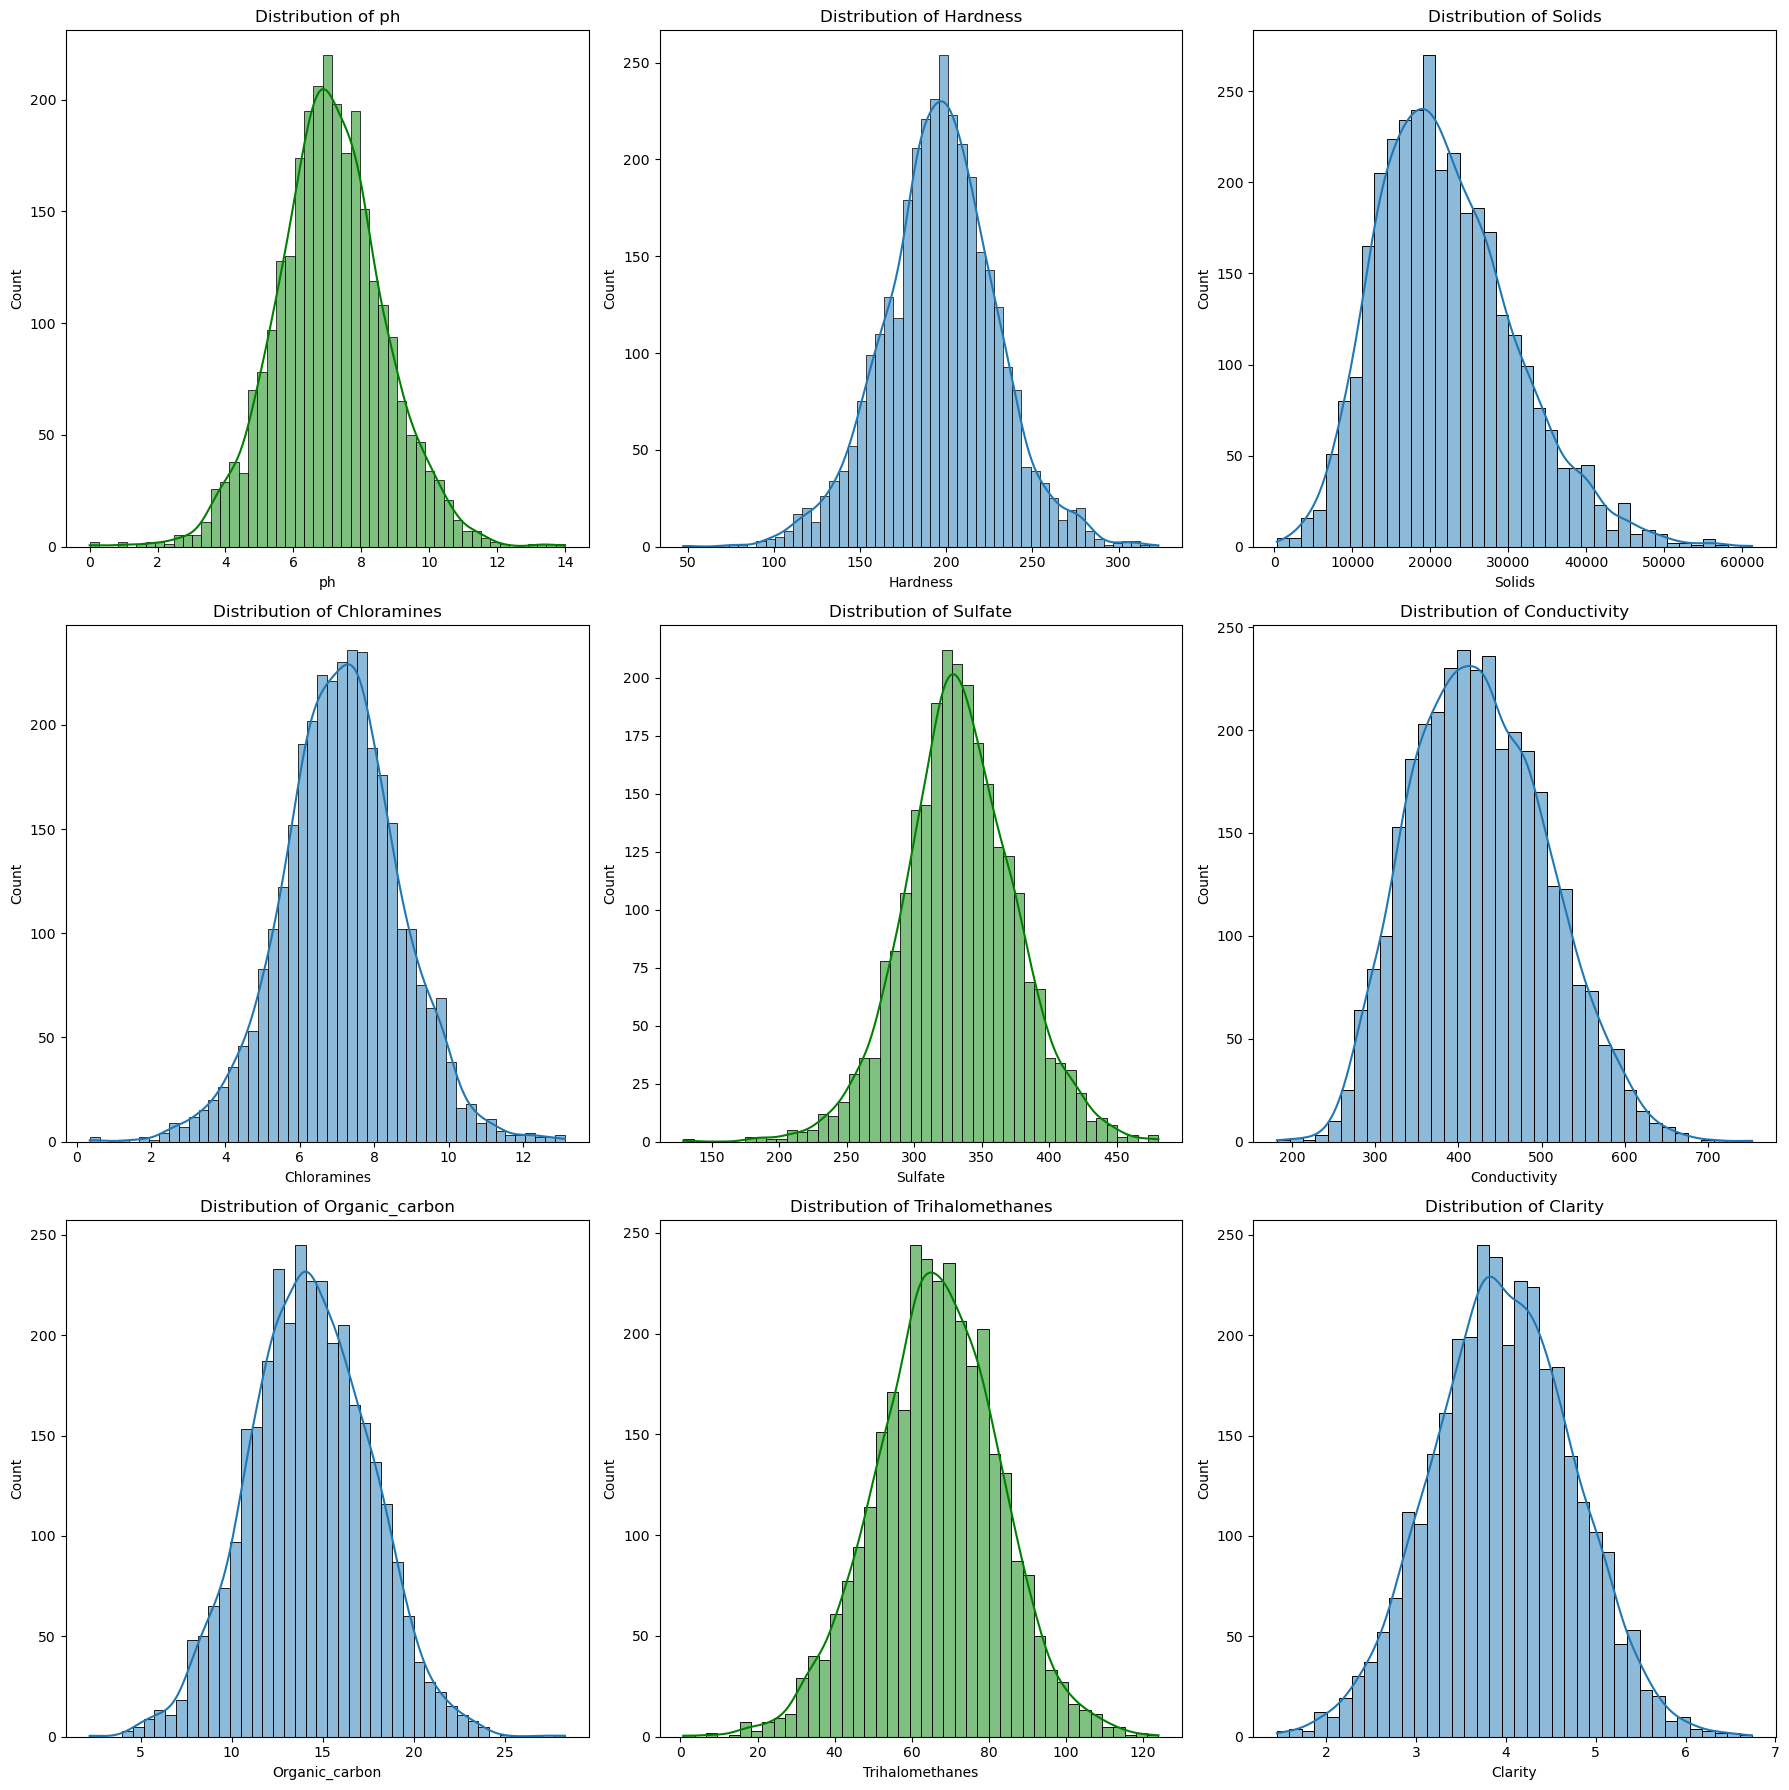

In [9]:
# analyzing the distributions of the features

df_independentFeatures = df.iloc[:,:9]
df_target = df['Quality']
df_independentFeatures
# drawing 9 distribution plots for 9 dependent features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, column in enumerate(df_independentFeatures.columns):
    #coloring green for the distribution of columns with null values 
    if df_independentFeatures[column].isnull().any():
        sns.histplot(df_independentFeatures[column], kde=True, ax=axes[i],color='green')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
    else:
        sns.histplot(df_independentFeatures[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

**By the analysis of the above distributions, all the independent features have the normal distributions and the green-colored
distributions(ph,Sulfate and Trihalomehtanes) which have the null values so it is likely that mean value should be used for filling the null values.**

#### Drawing scatter plot for ph

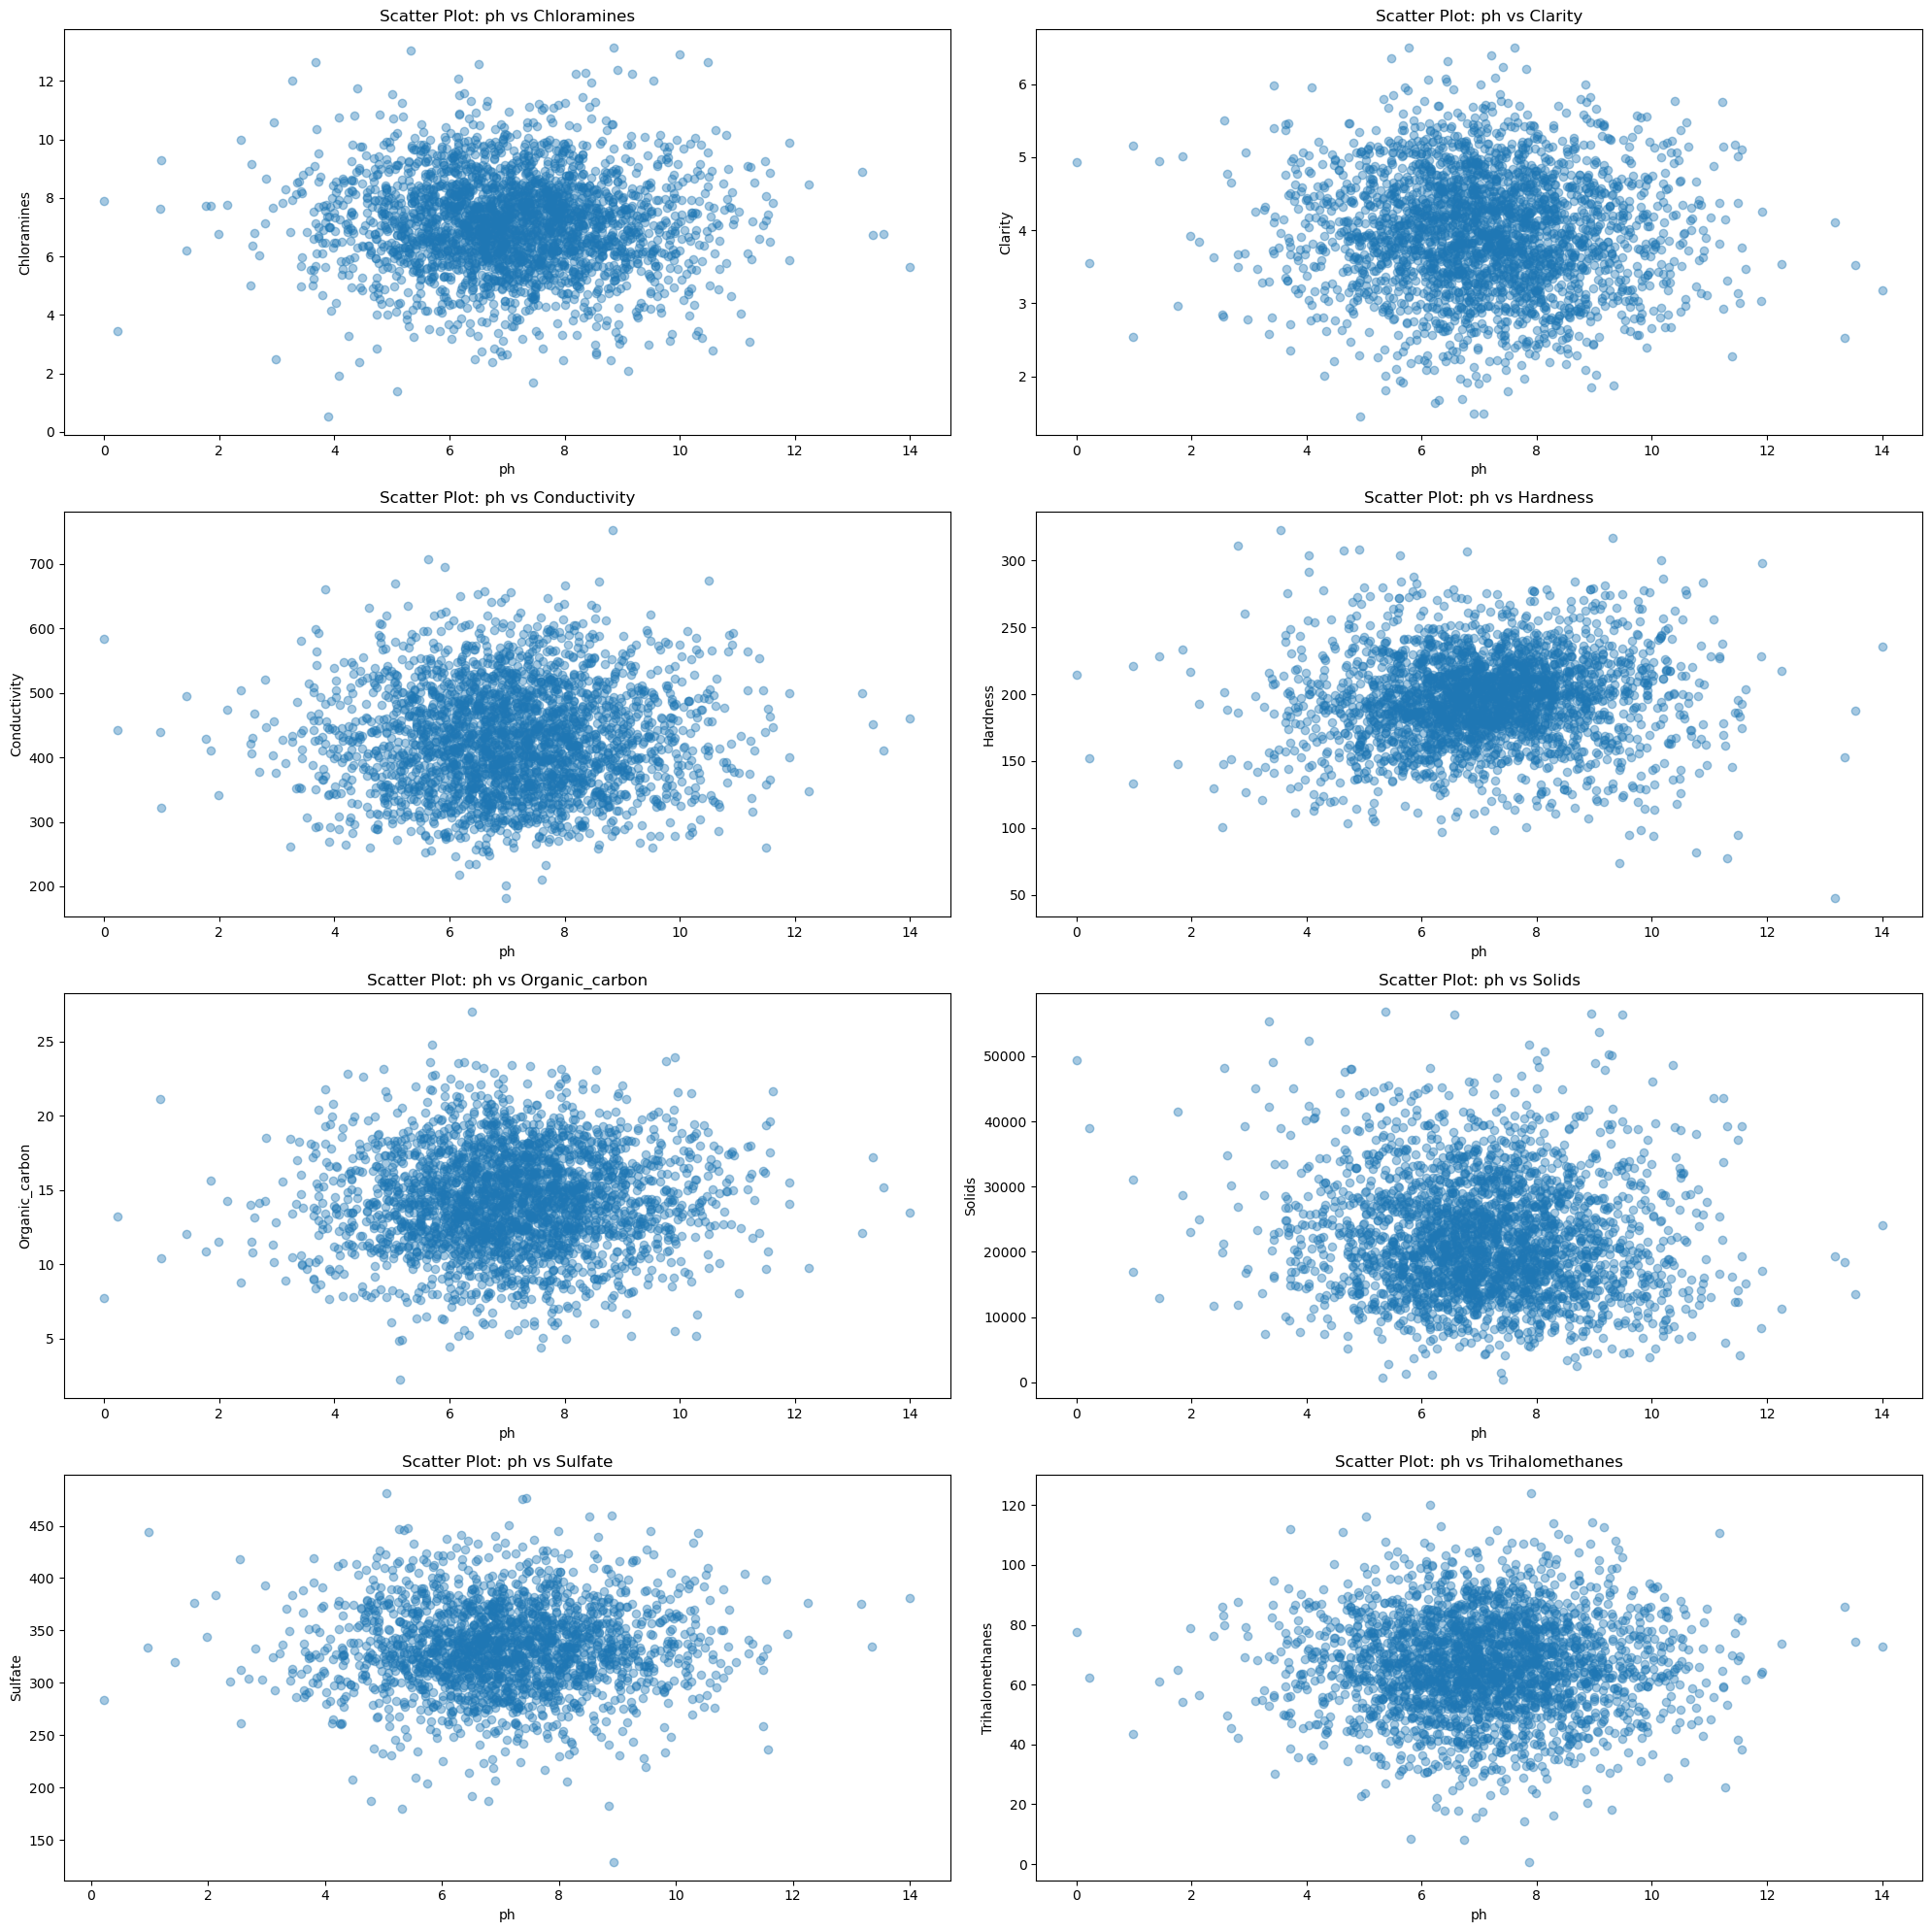

In [43]:
columns_for_scatter_ph = df.columns.difference(['ph', 'Quality'])
fig, axes = plt.subplots(4,2, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns_for_scatter_ph):
    axes[i].scatter(df['ph'], df[column], alpha=0.4)
    axes[i].set_title(f'Scatter Plot: ph vs {column}')
    axes[i].set_xlabel('ph')
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()

### Drawing the scatter plot for sulfate

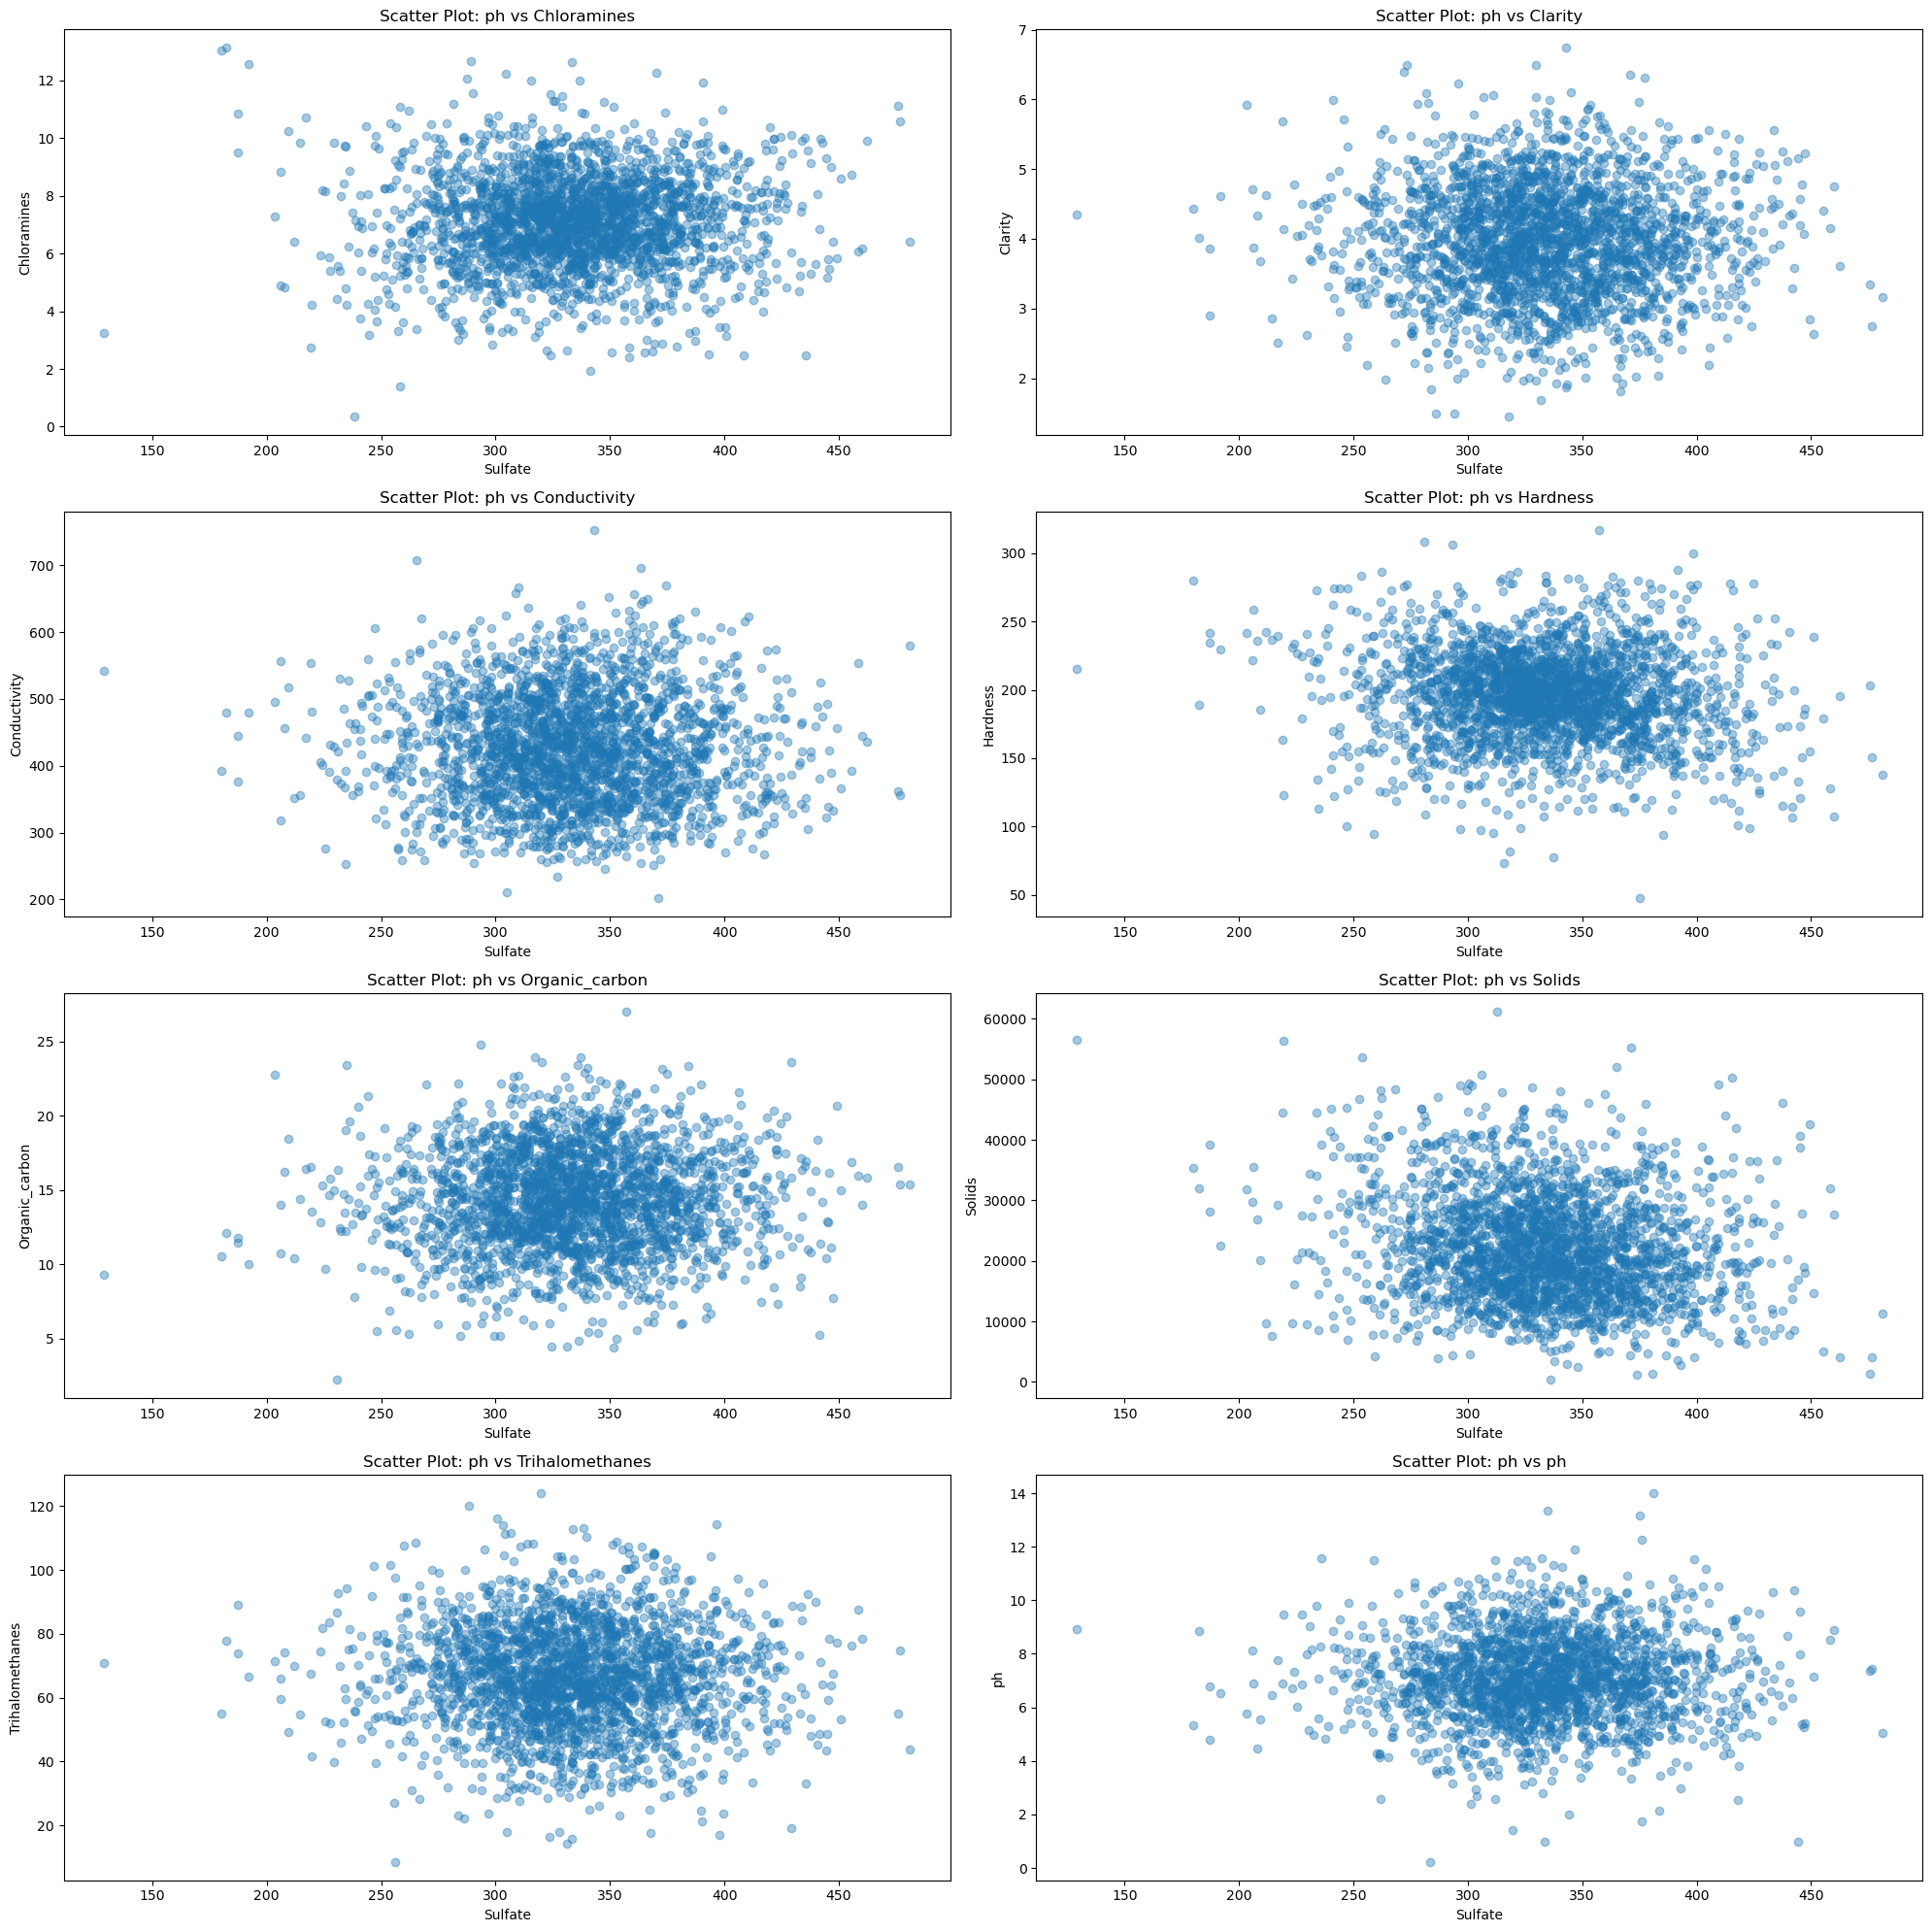

In [44]:
columns_for_scatter_sulfate = df.columns.difference(['Sulfate', 'Quality'])
fig, axes = plt.subplots(4,2, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns_for_scatter_sulfate):
    axes[i].scatter(df['Sulfate'], df[column], alpha=0.4)
    axes[i].set_title(f'Scatter Plot: ph vs {column}')
    axes[i].set_xlabel('Sulfate')
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()

### Drawing the scatter plot for Trihalomethanes

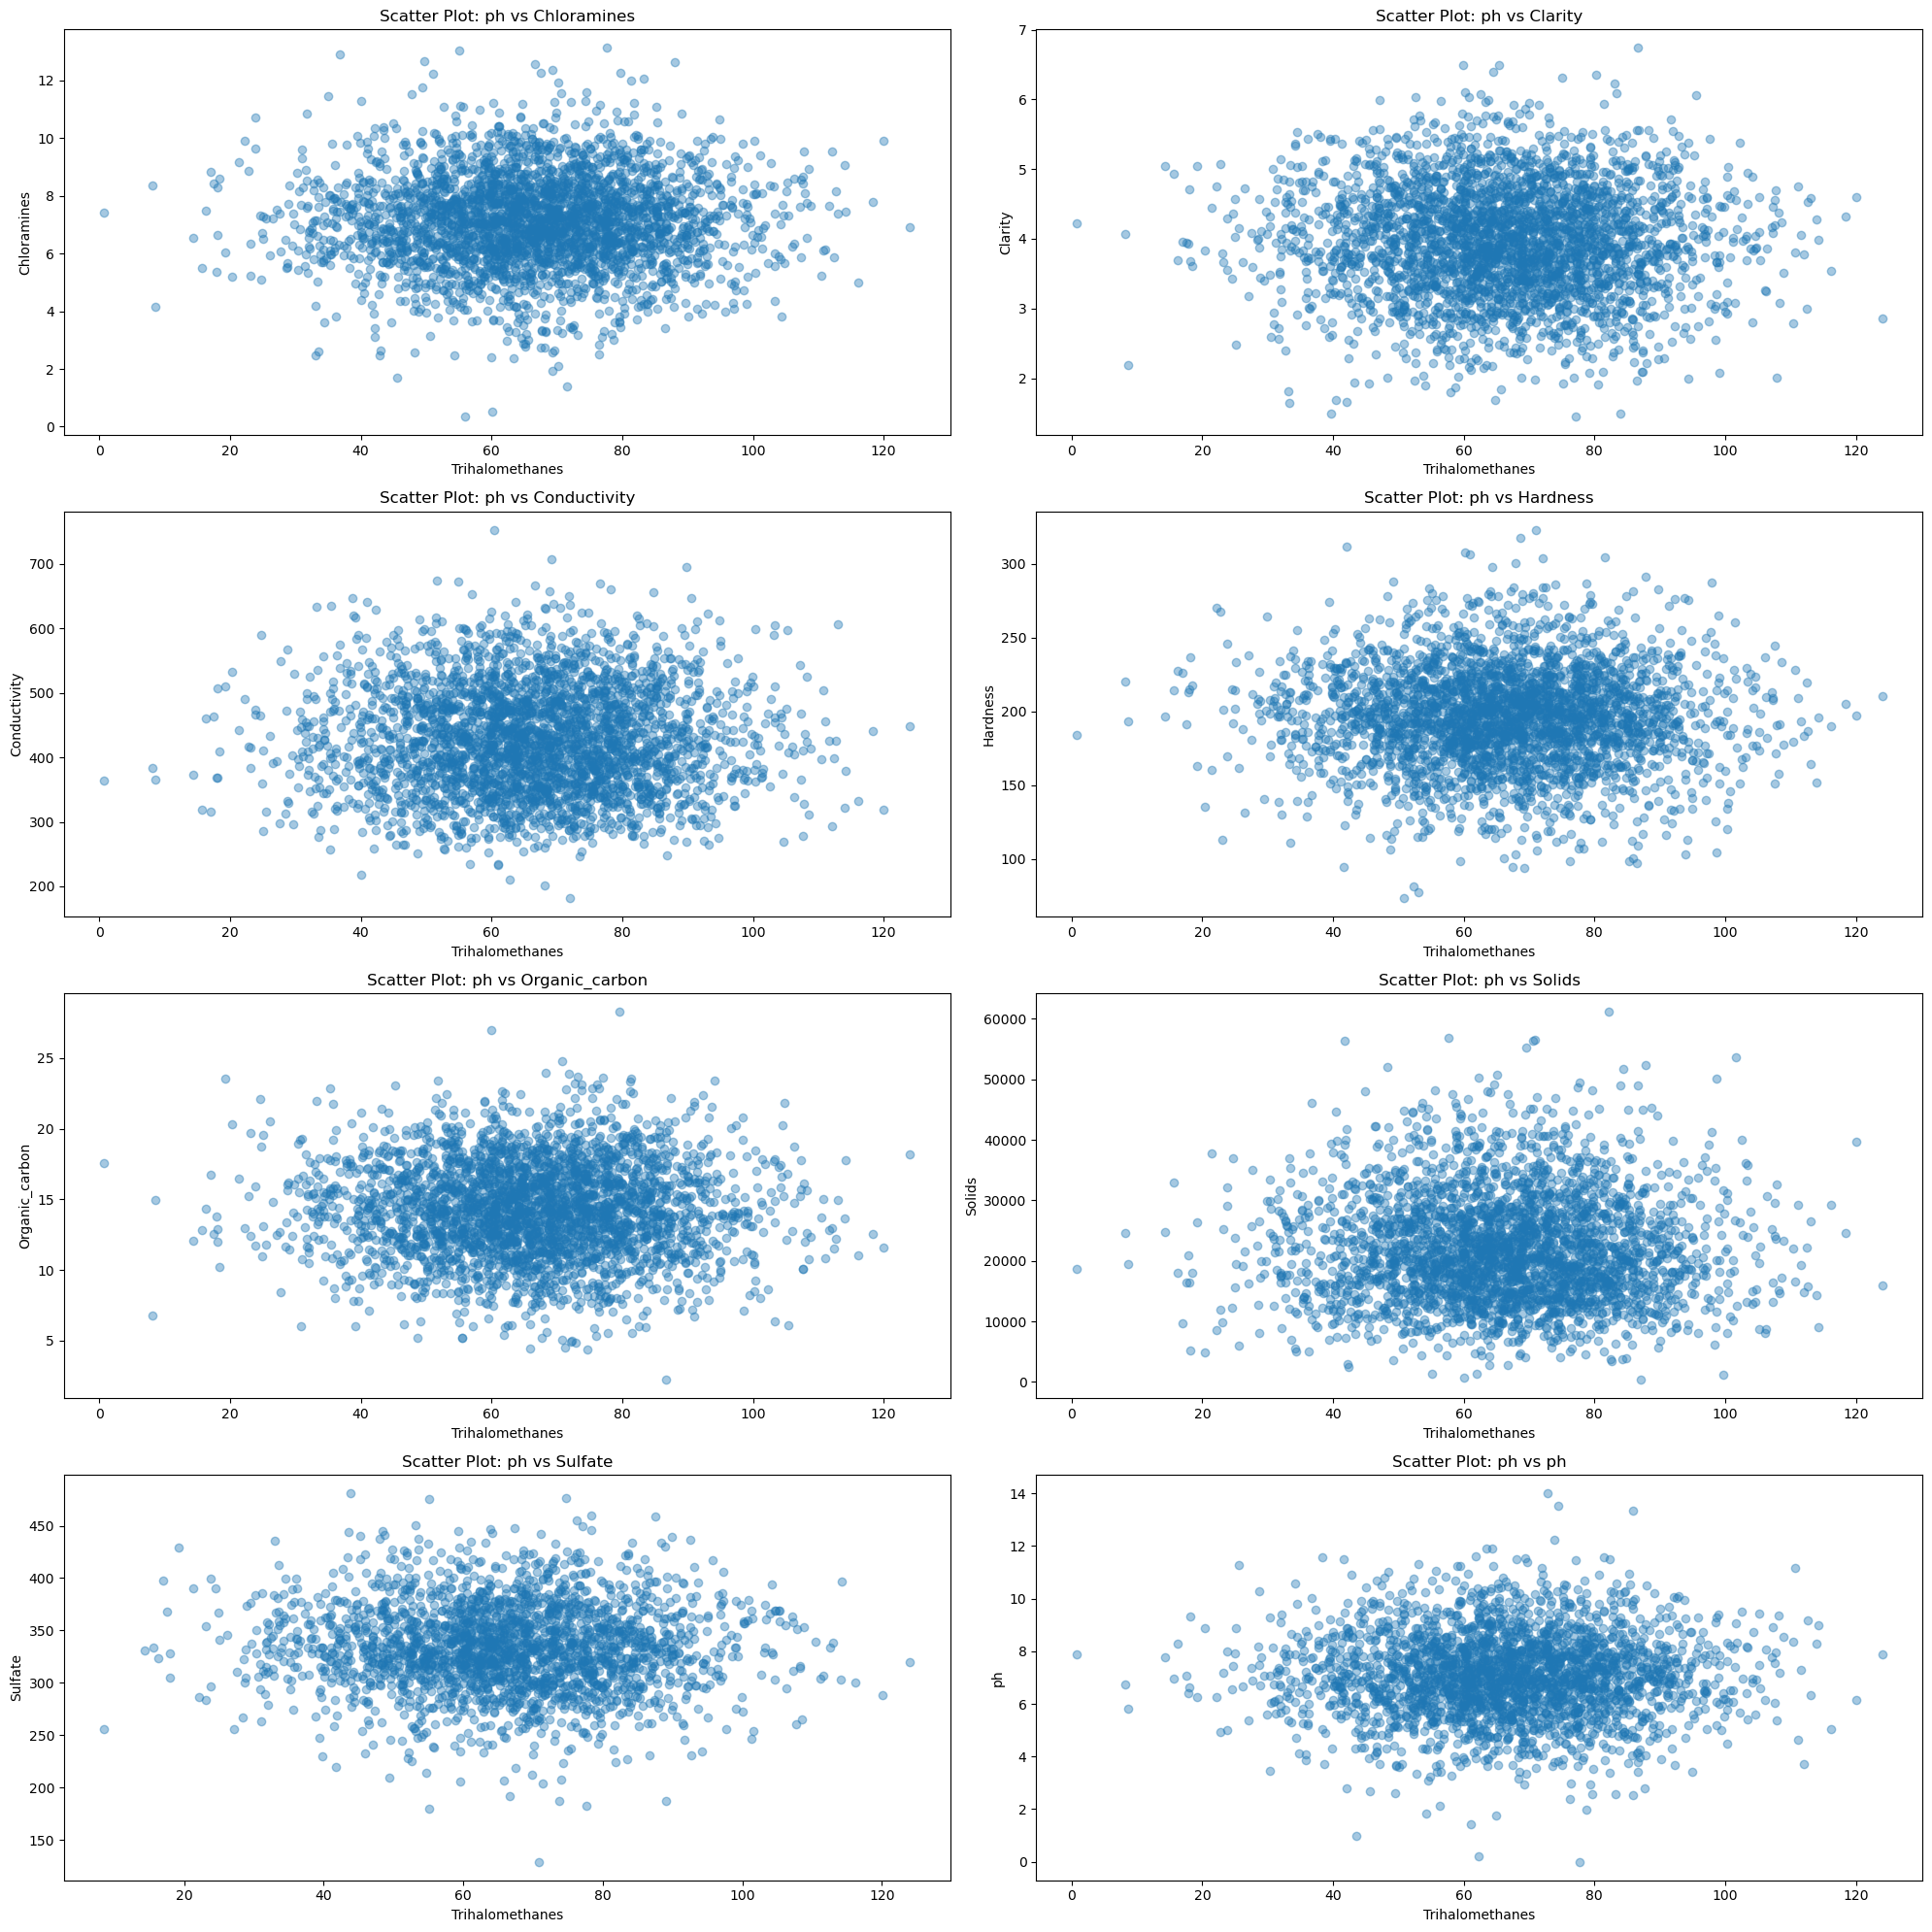

In [45]:
columns_for_scatter_Trihalomethanes = df.columns.difference(['Trihalomethanes', 'Quality'])
fig, axes = plt.subplots(4,2, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(columns_for_scatter_Trihalomethanes):
    axes[i].scatter(df['Trihalomethanes'], df[column], alpha=0.4)
    axes[i].set_title(f'Scatter Plot: ph vs {column}')
    axes[i].set_xlabel('Trihalomethanes')
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()

***By studying the scatter plots of ph,sulfate and trihalomethanes, it can be seen that they have no significant relationships with
other features so imputing missing values from other features can also not be done.***

## 3. Filling null values with their respective mean

In [10]:
df_to_fill_with_mean = df[['ph', 'Sulfate', 'Trihalomethanes']].copy()
df_to_fill_with_mean = df_to_fill_with_mean.fillna(df_to_fill_with_mean.mean())
print(df_to_fill_with_mean.isnull().sum())

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


**Now, it can be seen that null values in the three columns(ph,Sulfate and Trihalomethanes) are imputed with their mean values and no null values in those columns.**

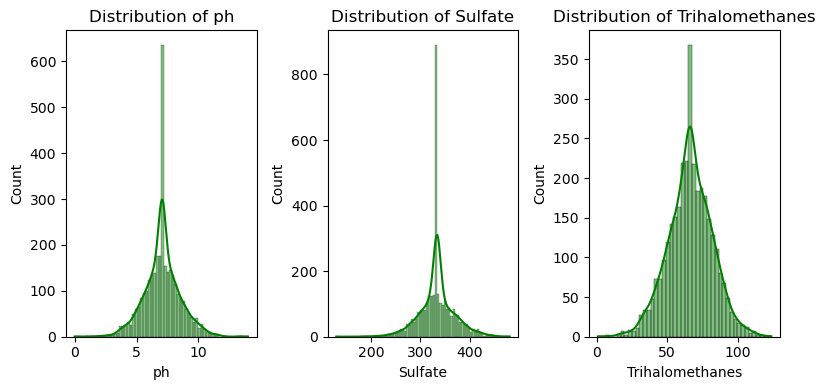

In [11]:
# drawing scatter plot for the three columns(ph,Sulfate,Trihalomethanes)in which null values are recently filled with mean
fig1,axes1 = plt.subplots(1,3,figsize=(8,4))
axes1 = axes1.flatten()
for i,column in enumerate(df_to_fill_with_mean):
    sns.histplot(df_to_fill_with_mean[column], kde=True, ax=axes1[i],color='green')
    axes1[i].set_title(f'Distribution of {column}')
    axes1[i].set_xlabel(column)
plt.tight_layout()
plt.show()

**Now when filled with mean, the frequency of middle value(mean) is altered and becomes too high in the middle of the distribution and now I tried to fill with the null values with random values.**

In [12]:
import numpy as np
df_to_fill_with_random = df[['ph', 'Sulfate', 'Trihalomethanes']].copy()
for column in df_to_fill_with_random:
    null_indices = df_to_fill_with_random[df_to_fill_with_random.isnull()].index
    df_to_fill_with_random.loc[null_indices,column]=np.random.choice(df_to_fill_with_random[column].dropna(),size=len(null_indices))
#printing to test if there are any null values left
print(df_to_fill_with_random.isnull().sum())   

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


## Now, checking again the distribution of three columns which had null values

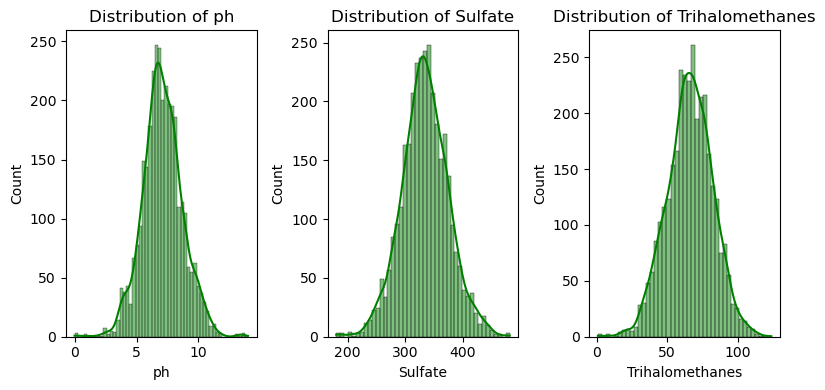

In [13]:
fig,axes = plt.subplots(1,3,figsize=(8,4))
axes = axes.flatten()
for i,column in enumerate(df_to_fill_with_random):
    sns.histplot(df_to_fill_with_random[column], kde=True, ax=axes[i],color='green')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
plt.tight_layout()
plt.show()

**It can be seen that the distributions are better now when filled with random values.**

In [14]:
# getting the imputed dataframe
df_imputed = pd.concat([df.drop(columns=['ph','Sulfate','Trihalomethanes']),df_to_fill_with_random],axis=1)
print(df_imputed.isnull().sum())

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Clarity            0
Quality            0
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64


**Now, all the missing values have been imputed**

In [15]:
print(df_imputed.describe().loc['count'])
print(f'\nRows of imputed data frame: {df_imputed.shape[0]}\nColumns of imputed data frame: {df_imputed.shape[1]}');

Hardness           3276.0
Solids             3276.0
Chloramines        3276.0
Conductivity       3276.0
Organic_carbon     3276.0
Clarity            3276.0
Quality            3276.0
ph                 3276.0
Sulfate            3276.0
Trihalomethanes    3276.0
Name: count, dtype: float64

Rows of imputed data frame: 3276
Columns of imputed data frame: 10


**From above, it can be seen that all the columns have the same number of rows.**

## Drawing boxplots of independent features for finding the outliers

In [51]:
df_for_boxplot = df_imputed.drop(columns=['Quality']).copy()
print(df_for_boxplot.columns)

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Clarity', 'ph', 'Sulfate', 'Trihalomethanes'],
      dtype='object')


NameError: name 'df_for_boxplot' is not defined

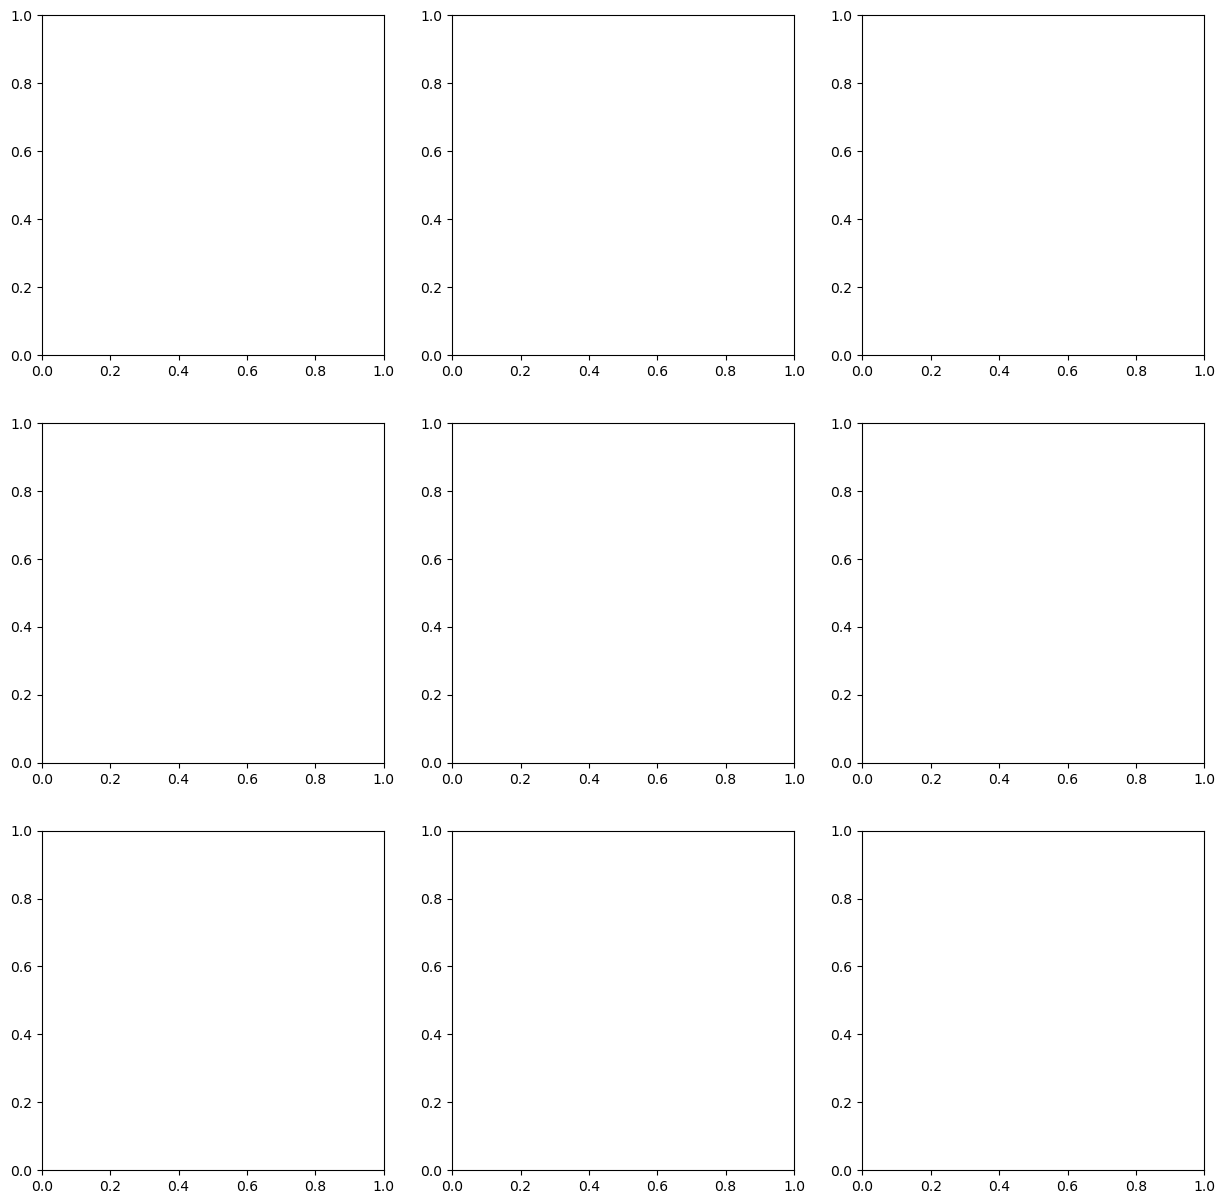

In [16]:
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,column in enumerate(df_for_boxplot.columns):
    data = df_for_boxplot[column]
    boxplot = axes[i].boxplot(data,flierprops=dict(markerfacecolor='red'))
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

**From the above boxplots, it can be seen that there are outliers in all of the dependent features. Now, I will not remove outlier.
Later, I will train the models with outliers and without outliers and I will decide which way is better.**

In [19]:
#creating a dataframe without outliers
features_without_target = df_imputed.drop(columns=['Quality'])
Q1 = features_without_target.quantile(0.25)
Q3 = features_without_target.quantile(0.75)
IQR = Q3 - Q1
outlier_rows = ((features_without_target < (Q1 - 1.5 * IQR)) | (features_without_target > (Q3 + 1.5 * IQR))).any(axis=1)
df_without_outliers = df_imputed[~outlier_rows]
print(df_without_outliers.shape)


(2932, 10)


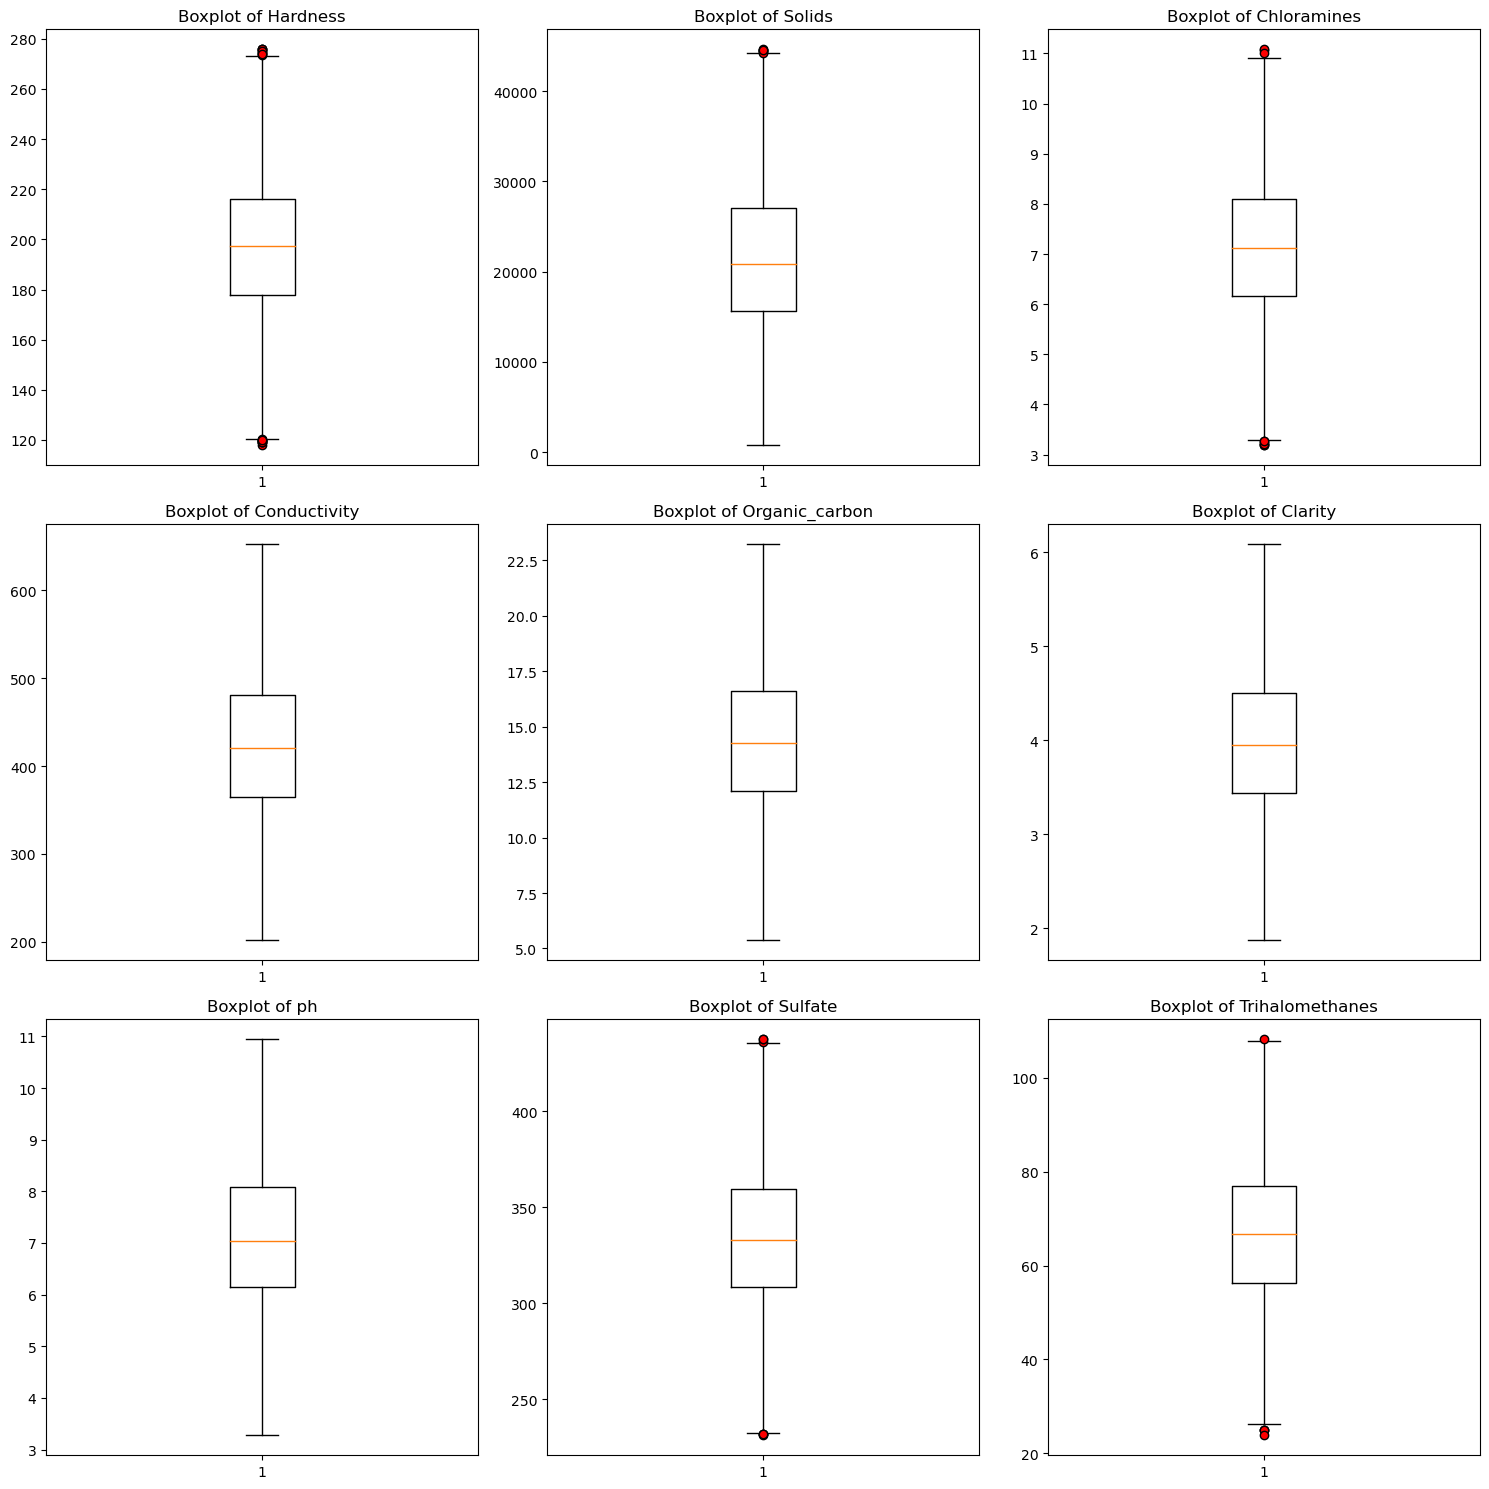

In [20]:
df_for_boxplot = df_without_outliers.drop(columns=['Quality']).copy()
#drawing boxplot without outliers
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,column in enumerate(df_for_boxplot.columns):
    data = df_for_boxplot[column]
    boxplot = axes[i].boxplot(data,flierprops=dict(markerfacecolor='red'))
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


**Now, from the above boxplots, outliers are removed for data frame df_without_outliers**

In [55]:
print(f"Row count for data frame with outliers:\n{df_without_outliers.describe().loc['count']}\n")
df_with_outliers = df_imputed
print(f"Row count for data frame with outliers:\n{df_with_outliers.describe().loc['count']}")

Row count for data frame with outliers:
Hardness           2883.0
Solids             2883.0
Chloramines        2883.0
Conductivity       2883.0
Organic_carbon     2883.0
Clarity            2883.0
Quality            2883.0
ph                 2883.0
Sulfate            2883.0
Trihalomethanes    2883.0
Name: count, dtype: float64

Row count for data frame with outliers:
Hardness           3276.0
Solids             3276.0
Chloramines        3276.0
Conductivity       3276.0
Organic_carbon     3276.0
Clarity            3276.0
Quality            3276.0
ph                 3276.0
Sulfate            3276.0
Trihalomethanes    3276.0
Name: count, dtype: float64


In [21]:
rows_greater_than_1000 = df_without_outliers[df_without_outliers['Solids'] > 1000]

# Get the number of rows
num_rows_greater_than_1000 = len(rows_greater_than_1000)
print(num_rows_greater_than_1000)

2931


## Data Scaling Before training model(Standardization)
**I wiill use Standardization for training distance-based models(kNN and SVM) and gradient based model(Logistic Regression)  but not for decision tree models.** 


# Modelling and Model Evaluation
**I will standardize the data with outliers and perform cross validation to evaluate the models(kNN,Logistic Regression and SVC) with the scores(Accuracy, Recall,Precision,F1 score) and after that i will do the same thing but I will use the data without outliers and compare the results. I perform the standardization because the values in each depedent features have different measurements and different range of values and distance-based models and gradient based model are sensitive to those differences.**

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline




# Standardization and cross-validation for different models
## Using data with outliers

In [57]:
# splitting data frame into X(dependent features) and Y(target feature)
X = df_with_outliers.drop('Quality',axis=1);
y = df_with_outliers['Quality'];
# splitting the data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#calling models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}



**Calcualting Accuracysocres using cross-validation for comparison purpose**

In [58]:
accuracy_results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)     
    accuracy_results.append(cv_results)

**Calcualting F1 socres using cross-validation for comparison purpose**

In [59]:
f1_scorer = make_scorer(f1_score)
f1_results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = f1_scorer)     
    f1_results.append(cv_results)




**Calcualting precision socres using cross-validation for comparison purpose**

In [60]:
precision_scorer = make_scorer(precision_score)
precision_results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = precision_scorer)     
    precision_results.append(cv_results)


**Calcualting recall socres using cross-validation for comparison purpose**

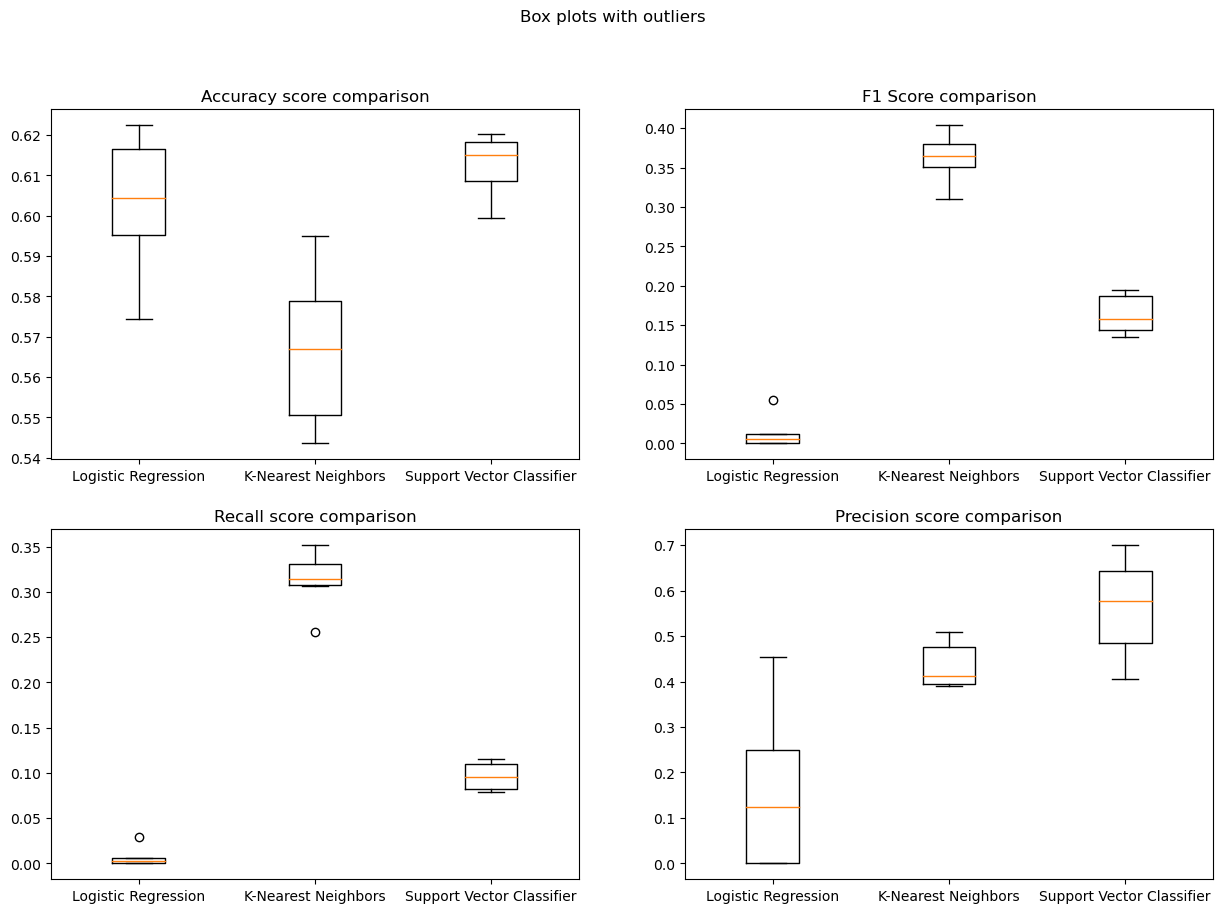

In [64]:
recall_scorer = make_scorer(recall_score)
recall_results = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = recall_scorer)     
    recall_results.append(cv_results)
# drawing box plots to compare the scores
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Box plots with outliers')
axes[0,0].boxplot(accuracy_results, labels=models.keys())
axes[0,0].set_title('Accuracy score comparison')

axes[0,1].boxplot(f1_results, labels=models.keys())
axes[0,1].set_title('F1 Score comparison')

axes[1,0].boxplot(recall_results, labels=models.keys())
axes[1,0].set_title('Recall score comparison')

axes[1,1].boxplot(precision_results, labels=models.keys())
axes[1,1].set_title('Precision score comparison')
plt.show()

**By analysing the above box plot,the scores of each model are not good enough**

## Using data without outliers

In [65]:
X = df_without_outliers.drop('Quality',axis=1);
y = df_without_outliers['Quality'];
# splitting the data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#accuracy result calculation
accuracy_results1 = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)     
    accuracy_results1.append(cv_results)
#f1 score calculation   

f1_results1 = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = f1_scorer)     
    f1_results1.append(cv_results)
# precision result calculation

precision_results1 = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = precision_scorer)     
    precision_results1.append(cv_results)

# recall result calculation

recall_results1 = []
for model in models.values():     
    kf = KFold(n_splits=6, random_state=42, shuffle=True)     
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf,scoring = recall_scorer)     
    recall_results1.append(cv_results)

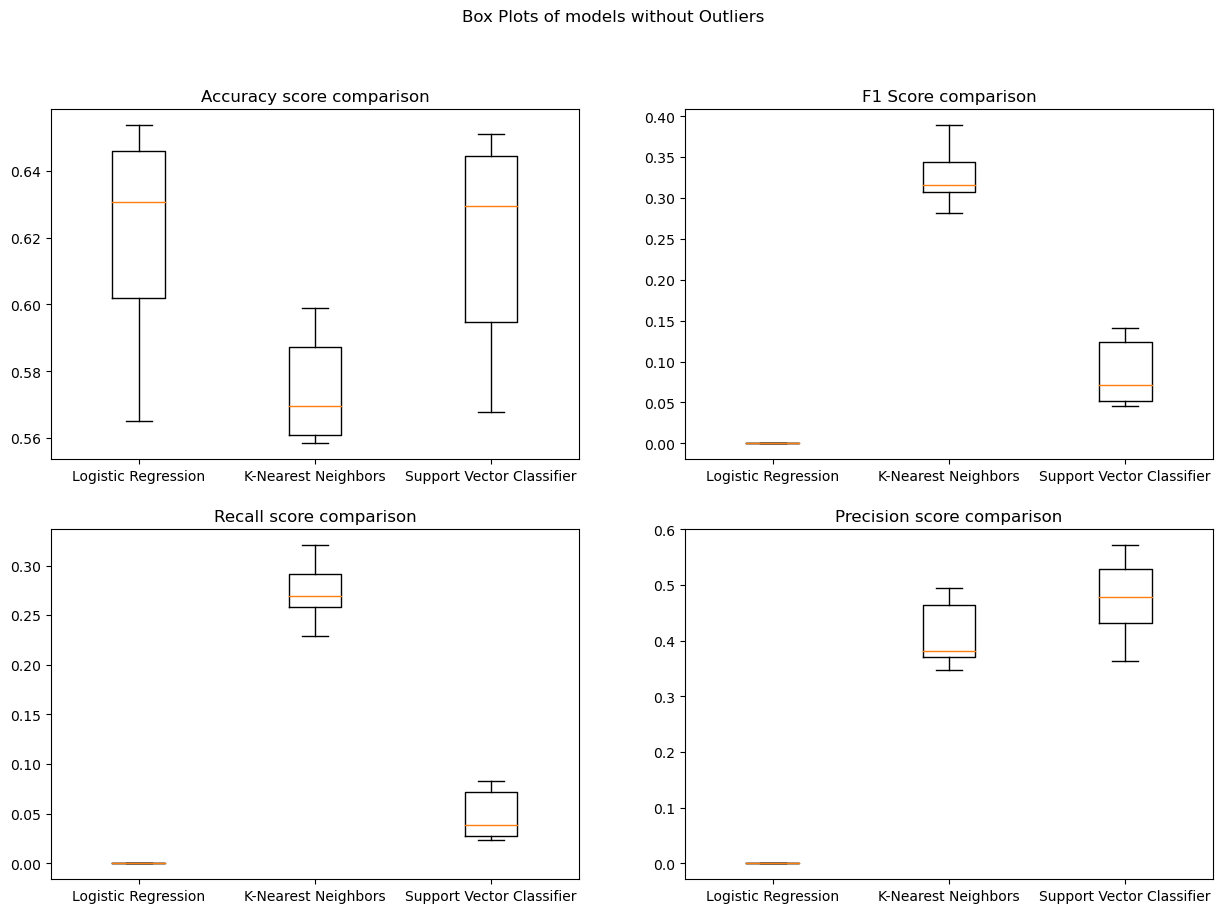

In [66]:
# Drawing boxplot for comparison
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Box Plots of models without Outliers')
axes[0,0].boxplot(accuracy_results1, labels=models.keys())
axes[0,0].set_title('Accuracy score comparison')

axes[0,1].boxplot(f1_results1, labels=models.keys())
axes[0,1].set_title('F1 Score comparison')

axes[1,0].boxplot(recall_results1, labels=models.keys())
axes[1,0].set_title('Recall score comparison')

axes[1,1].boxplot(precision_results1, labels=models.keys())
axes[1,1].set_title('Precision score comparison')
plt.show()

**By comparing the boxplots between data with outliers and without outliers, there is not much difference for Logistic Regression,
K-Nearest Neighbors and Support vector classifier and the scores are not much difference.**

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
#using outliers now
X = df_with_outliers.drop('Quality',axis=1);
y = df_with_outliers['Quality'];
# splitting the data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation and get metric scores
metric_scores = {}
for metric_name, scorer in scoring.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True) 
    scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring=scorer)
    metric_scores[metric_name] = scores

# Print the metric scores for each fold
for metric_name, scores in metric_scores.items():
    print(f"{metric_name.capitalize()} Scores for each fold:", scores)

# Print the mean and standard deviation of the metric scores
for metric_name, scores in metric_scores.items():
    print(f"Mean {metric_name.capitalize()}: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}")

Accuracy Scores for each fold: [0.5423341  0.51029748 0.50800915 0.49885584 0.50917431 0.49311927]
Precision Scores for each fold: [0.38       0.39204545 0.41758242 0.34302326 0.37853107 0.36956522]
Recall Scores for each fold: [0.34756098 0.39204545 0.41081081 0.35757576 0.39181287 0.39306358]
F1 Scores for each fold: [0.36305732 0.39204545 0.41416894 0.35014837 0.38505747 0.38095238]
Mean Accuracy: 0.5103
Standard Deviation: 0.0156
Mean Precision: 0.3801
Standard Deviation: 0.0225
Mean Recall: 0.3821
Standard Deviation: 0.0221
Mean F1: 0.3809
Standard Deviation: 0.0205


In [ ]:
print(df['Quality'].value_counts())

In [ ]:
quality_correlation = correlations['Quality'].sort_values(ascending=False)
print(quality_correlation)

In [ ]:
df.head()

In [ ]:
sns.scatterplot(x='Chloramines', y='Quality', data=df)
plt.title('Scatter Plot: Chloramines vs. Water Quality')
plt.show()

In [ ]:
sns.violinplot(x='Quality', y='Chloramines', data=df)
plt.title('Violin Plot: Chloramines vs. Water Quality')
plt.show()


In [ ]:
sns.boxplot(x='Quality', y='Trihalomethanes', data=df)
plt.title('Box Plot: Trihalomethanes vs. Water Quality')
plt.show()
df.tail()


In [ ]:
correlations